<img src="../support_files/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">August 18-19, 2018</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Custom Modules and Version Control</h1></center>

<p>We have seen that new functinoality in Python can be encapsulated as a <i>module</i>, and that we can import modules into our own code. In this section we will create a new Python module. 

- Important because encapsulating functions makes them <i>reusable</i>. We will use this mechanism to develop tools that we can share with each other during the course.

- We would also like to be able to <i>collaborate</i> on these tools, so at the same time we will look at some of the basics of using git to track changes to our module. This will lay the foundation for collaborative workflows with git that will be dicussed later in the course.

- Jupyter is not (currently) a good tool for developing modules or for learning about git, so we will do most of our work with a text editor and a git application (GitKraken) for this section.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Let's begin by making a simple module. For now, it will contain just one function we can use to downsample time-series data.
</div>

In [1]:
# here is the code we'd like to include in the module:

import numpy as np

def downsample(data, n, axis=0):
    """Reduce the number of samples in an array by averaging together
    n samples at a time.
    """
    if n <= 1:
        return data
    new_len = data.shape[axis] // n
    s = list(data.shape)
    s[axis] = new_len
    s.insert(axis+1, n)
    sl = [slice(None)] * data.ndim
    sl[axis] = slice(0, new_len*n)
    d1 = data[tuple(sl)]
    d1.shape = tuple(s)
    d2 = d1.mean(axis+1)
    return d2

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Just so we understand what this function does, let's generate a noisy time-series signal and plot it:
</div>

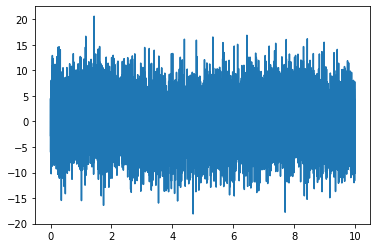

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0, 10, 10000)
data = np.sin(t) + 5 * np.random.normal(size=len(t))
plt.plot(t, data);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
And this is what the same signal looks like after it has been downsampled. Note that the downsampled signal has many fewer samples, and the overall noise is much smaller.
</div>

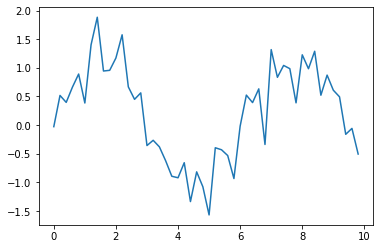

In [3]:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Just to reiterate: We have created a useful function, and now we would like to encapsulate it into a module so that

<ul>
<li>We can re-use this function in many different places without copying it, and
<li>We can share this function with other people.
</ul>

<br>
<hr>

Here's how to turn this code into a module:
<ol>
<li>Open a code editor (pycharm, sublime, etc.) and paste in the definition of `downsample()` given above, including the `import numpy` statement.
<li>Save the file as `my_module.py` in the same location as this notebook.
</ol>
<br>
You're done!<br>

Now let's see if it works:

</div>

In [5]:
# Remove the old downsample (so you can't cheat!)
if 'downsample' in locals():
    del downsample

# Import the new definition of `downsample` from your module
from my_module import downsample

# If you get "ImportError: No module named my_module", then make sure
# the .py file was saved in the same folder as this notebook file.

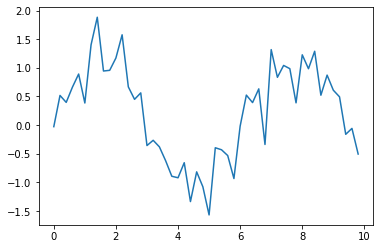

In [6]:
# test again:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Good so far, but there are some issues with this approach:

<ul>
<li>As our code becomes more complex, we will often want to organize it into multiple files and make them all appear as a single importable module.
<li>If we distribute this code, we will at least want to include a README to explain what it's about, so I'd really like my module to live inside its own folder.
</ul>

<hr>
So now we are going to turn this module into a <i>package</i>, which is really just a collection of modules inside a folder, along with some Python glue.
<ol>
<li>Make a new folder, in the same location as this notebook, called `my_package`
<li>Move `my_module.py` into this new folder
<li>Create an empty text file called `__init__.py` inside `my_package`. (note the double underscores)
</ol>
<br>
The `__init__.py` file is a hint to Python that tells it "this folder is a package that can be imported".

<hr>
Now let's try importing from the new package:

</div>

In [9]:
# Remove the old downsample (so you can't cheat!)
if 'downsample' in locals():
    del downsample

# Import downsample from our shiny new package
from my_package.my_module import downsample

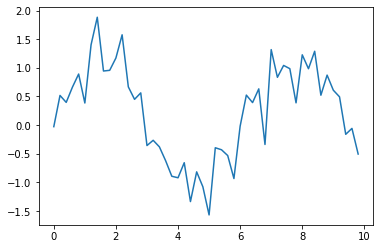

In [10]:
# test again:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>A note about namespaces</h3>

<p>Each python <i>file</i> that you work with has its own isolated namespace. That means we could write `x=1` inside the module, and `x=2` inside this notebook, and the two names will <i>not</i> collide; each `x` variable lives in a different namespace. `import` statements are how we create a reference from one module's namespace into another.

</div>

In [11]:
import my_package.my_module

# my_package contains a namespace with the variable "my_module"
dir(my_package)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'my_module']

In [12]:
# my_module contains its own namespace where the "downsample" function is defined and numpy has been imported
dir(my_package.my_module)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'downsample',
 'np']

In [13]:
# The notebook we are working in contains its own namespace, which includes the name "my_package",
# amongst others.
dir()

['In',
 'Out',
 '_',
 '_11',
 '_12',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'atexit',
 'data',
 'downsample',
 'ds_data',
 'exit',
 'get_ipython',
 'historyPath',
 'my_package',
 'np',
 'os',
 'plt',
 'quit',
 'readline',
 'rlcompleter',
 'save_history',
 't']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Versioning your code</h2>
<br>
Now that we have a working package, let's start talking about version control. We are going to use `git` to record a history of all changes to all files in this package. `git` the de-facto industry standard tool for collaborative software development. This will enable us to do several important things:

<ul>
<li>Compare the differences between versions of the code
<li>Temporarily run other versions of the code, or revert back to an earlier version if we encounter problems
<li>Publish our code on websites like github or bitbucket
<li>Collaborate with others by automatically merging their changes with ours
</ul>

Managing code changes with a team of people all developing in parallel is really difficult! Version control systems like git make this easier, but still come with a steep learning curve. We want you to lean some basic concepts today, but becoming comfortable with git will just take practice.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Tools for working with git</h3>
<br>
There are three major tools we will introduce for interacting with git

<ol>
    <li><b>git</b> itself. This is the software that runs under the hood to keep track of our code changes. We will rarely interact with git <i>directly</i> during this session, but it may be required later.
    <li><b>GitHub.com</b> is a commercial service + web application (free for open source projects) that allows us to store and publish code on the web. It implements some very nice tools for online collaboration that will be introduced later in the course.
    <li><b>GitKraken</b> is a commercial (also free for open source projects) graphical tool that we will use to interact with git on our laptops. Although it is possible to use git directly from the command line, GitKraken is a much easier way for us to get started.
</ol>

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Getting started with GitKraken</h3>

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
<ol>
<li>First: fire up GitKraken on your laptop and log in. You can sign in with your github account, or create a new GitKraken account.

<li>In order to begin tracking code changes in our new package, we need to <i>initialize</i> a git repository in the package folder.

<ul>
    <li>Click the open repository button (upper left corner)
    <li>Click "Init" and then "Local only"
    <li>Under "Initialize in", navigate to and select your "my_package" folder, then click "select folder"
    <li>Leave everything else blank and click "Create repository"
</ul>

</ol>
</div>

<h3>What has changed?</h3>

<ul>
    <li>A subfolder "my_package/.git" has been created by <b>git</b>, which is where git will store all code version information.
    <li>An initial blank "commit" has been created:
</ul>
<img src="../support_files/gitkraken_1.png">

<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>


<h2>Definitions:</h2>

<p><b>Commit (n)</b> A snapshot of the state of all files in your project at one point in time. A commit includes some metadata:
<ul>
    <li>Author
    <li>Creation date
    <li>A short description (written by the developer)
    <li>A unique ID (also called a "hash")
    <li>Parent ID (which commit came before this one)
</ul>

<p><b>Commit (v)</b> To create a new commit. 

<p><b>Repository (n)</b> A folder that contains all of the files associated with a project and the history of changes made to each file. A git repository contains a `.git` subfolder that stores all data about the history of commits and the configuration of the repository.

<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Adding files to the repository</h3>
In the screenshot above, we see two circles representing commits. On the bottom is a full circle labeled "Initial commit", which was created when we initialized the repository. On the top is a dashed circle lebeled "WIP" (meaning work in progress) that represents a commit you have not created yet. To the right, a green "[+] 2" indicates that there are 2 files present in the my_package folder that are <i>not</i> currently begin tracked by git. Our next task will be to finish creating that commit. this happens in two parts:

<h4>1. Staging changes to be committed</h4>
To the right, we see two boxes <b>Unstaged Files</b> and <b>Staged Files</b>:

<img src="../support_files/gitkraken_2.png">

The top box contains file changes that <i>differ</i> from the last full commit (the one called "Initial commit" here). It tells us that the files "\_\_init__.py" and "my_module.py" are not tracked by git in this repository.

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
    Tell git that our two .py files should be <i>added</i> to the repository with the next commit. This is called "staging changes"; we are just preparing a list of things that will go into the next commit:
    <ol>
        <li>Point to "__init__.py" and click "Stage file"
        <li>Repeat for "my_module.py"
    </ol>
</div>

We now see that our two files have moved into the "Staged files" box.
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>2. Creating a commit from staged changes</h4>

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
    <ol>
        <li>Type in a commit message - a short description of the changes you are introducing. I used the message "Added init and module files".<img src="../support_files/gitkraken_3.png"/></li>
        <li>Click the shiny green button "Commit changes to 2 files"</li>
    </ol>
</div>
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
You should now see that a few things have changed:

<ul>
    <li>The imaginary (dashed-circle) is replaced by a new commit (full-circle).
    <li>The name "master" now points to the second commit. We will come back to this a little later.
</ul>

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
    Browse through the history of changes in this repository:
    <ol>
        <li>Click on the bottom "Initial commit" and look at the list of changes on the right
        <li>Click on the top commit that you created and read the list of changes again.
    </ol>
</div>


<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Practice: adding more commits</h3>

We will now go through the motions of editing and committing code changes a few times. The basic workflow will be:

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
    <ol>
        <li>Make code changes
        <li>Select the WIP commit in gitkraken
        <li>Click on changed files to review changes
        <li>Stage changes as you go (or fix them as needed)
        <li>Create a new commit
    </ol>
</div>

<h4>Change set 1:</h4>

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
    In your code editor, go back to `my_module.py` and add some more detail to the docstring:
    <pre>
    Parameters
    ----------
    data : array
        The input array to be downsampled.
    n : int
        Downsampling factor; this is the number of raw samples that will be averaged
        together for each new sample.
    axis : int
        The array axis that should be downsampled (default=0).
    </pre>
</div>
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div>
<h3>Git good practice #1: Make clean commits.</h3>
<br>
    <i>Staging</i> gives us finer control over which changes are included in each commit. First we tell git which changes will be included in the next commit, and then we commit all staged changes at once. In this simple example, it may seem like an unnecessary extra step. If git already knows which files have changed, why not just commit all changes automatically?

<p>When working with any version control system, it is helpful for each code snapshot to introduce changes that are <i>complete</i> and <i>related</i>. Ideally, each new commit should add one new feature, or bugfix, or concept, and the commit should not contain unfinished ideas. Why is this good practice? Sometimes we need to go back through the history of changes to find where a bug was introduced, or to revert a set of changes, or even just to understand the structure of the commit history (which can become quite complex).

<p>But many of us don't program that way--we like to plow through the code, making many unrelated changes here and there. In practice, it is very easy (and common) to lose track of which files you have changed in between commits. Perhaps you added some temporary debugging code that you forgot to remove, or started a new file but forgot to ask git to track it, or forgot about an unfinished piece of code. 

<p><b>Get into the habit of checking the state of your repository before each commit.</b> Carefully review your work before you stage and commit it--errors will be much easier to catch and resolve at this time, while you still remember why you made these changes. Make an effort to organize your changes into logical, complete commits.

<p><b>BUT:</b> at the same time, balance this with the need to develop quickly; sometimes the extra organization really isn't worth the extra effort, especially when you are prototyping a new project (my commit frequency varies between once per day and several times per hour, depending on the task). Over time you will learn what works for you.
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h3>A little more commit practice</h3>
<br>
Let's make a few more changes:

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
    <ul>
    <li>Add more documentation to the `downsample()` docstring:
    <pre>
      Returns
      -------
      array
          An array in which each item is the average of *n* items
          from the input *data* array.
    </pre>
    <li>Modify your `README` file to contain a description of your package (just make something up).
    <li>Create a `.gitignore` file that contains just the text: `*.pyc`. Notice that immediately after you create this file, the `.pyc` files no longer appear in the list of untracked changes.
    </ul>
    
After doing the steps above, go through the process of reviewing, staging, and committing each of these changes one at a time (you should end up with 3 new commits). Notice that you can click on each modified file to see what has changed before staging it. 
<br><br>
Select the commit in which your .py file was changed. On the right side, the name of the file appears with a yellow [...] symbol, indicating that the file was modified. Select that file, and you should see the changes that were made during that commit. Click the (>) button at the upper-left corner to get back to the list of commits.

</div>



<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h2>Branch and Merge</h2>

The commits we have made so far make a linear sequence--in gitkraken we see the commits connecting along a straight line from the initial commit to the most recent. This is often what we see when we develop code alone, and in this simple case, the tools we are showing you (git, github, gitkraken) are overkill; all we really get so far is a history of code versions.

All this changes when we begin working with other people. The immediate difference is that two people can work in parallel, so it no longer makes sense to think of code development as a single linear chain. Instead, we have at least two parallel chains in which code changes are periodically shared from one to another. This new workflow introduces a lot of complexity, and managing that complexity is the primary purpose of git.

Git emables parallel, collaborative using two tools: <i>branching</i> and <i>merging</i>.

<img src="../support_files/parallel_commits.png">
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<h2>Definitions:</h2>

<p><b>Branch (n)</b> 
<ol>
<li>A chain of related commits. This is <b>not</b> the definition understood by git.
<li>A named pointer to a specific commit. Unlike tags, branches have special property: when a branch is checked out, creating a new commit will cause the branch to point to the newly created commit. In this way, branches usually point to the most recent commit in any chain of commits.
</ol>

<p><b>Branch (v)</b> To create a new branch.
    
<p><b>Merge (v)</b> To create a new commit that combines all changes from two branches.
    
<p><b>Checkout (v)</b> To <i>replace</i> the contents of the files that are currently present in the repository with the contents stored in a specific commit. Git has the capability to check out <i>any</i> commit, which lets you temporarily run other versions of the code. However, gitkraken is more limited in this regard (more on this later).
    
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
We will talk about collaborative development later in the course. For now, let's just practice making branches and merging them back together. Here is a common scenario: You have some code that is working and produces good results. You would like to add on a new feature, but that requires you to temporarily break some things in order to refactor your code. Half way through this process, your PI asks if you can re-run the working analysis with some small changes. Now you have two parallel development pathways--your working code with small changes, and your broken new-feature code. 

There are many ways you can handle this situation with git. The one we will introduce today is the most commonly used:
<ol>
    <li>Your `master` branch shoould always point to the latest <i>working</i> copy of your code.
    <li>New features are developed in <i>topic branches</i> until they are ready to be merged back into the master branch.
</ol>

<img src="../support_files/topic_branches.png">

With this workflow, our topic branches keep unrelated code changes separate from each other until they are complete. Each topic branch serves as a reminder about a feature you were working on and how it was progressing. After a topic branch is merged into `master`, you can delete the topic branch (this does not delete the code changes; remember that a git branch is just a <i>pointer</i> to a particular commit. Deleting the branch does not necessarily affect the commit).

<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>


<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h4>Add a couple of commits in a new branch</h4>

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
<ol>
    <li>Notice that we already have a branch: master, and that it points to the latest commit
    <li>Click the "Branch" button at the top of the window and type in a name for the new branch (I used "new-feature")
    <li>Notice that the "new-feature" branch has a +1 next to it. When you point to the branch, it shows you that there are actually two branches here that point to the same commit (master and new-feature). Notice also the check mark next to "new-feature" -- this tells you which branch is currently checked out.
    <li>Edit `my_module.py` and add a new function (it doesn't need to do anything)
    <li>Make a commit. Notice that new-feature now points to the latest commit, but master does not (because master is not checked out).
    <li>Repeat: edit some code and make another commit.
</ol>
</div>
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h4>Switch between branches</h4>

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
<ol>
    <li>Check out the master branch by double-clicking on "master". Note the check mark moves, and note also that the code in my_module.py has reverted back to its original state. 
    <li>Make a change to the README file and add a commit. Look at the commit tree again--it should now be more apparent that you have two parallel development paths in progress (you may need to resize the commit tree panel to see this--find the vertical line between the commit circles and their descriptons, drag that line to the right as far as it will go).
    <li>Check out the new-feature branch. Again notice that your code has reverted back to where we left off. Commit one more change to `my_module.py`.
</div>
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>


<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h4>Merge branches</h4>

<div style='color: #000; background-color: #CCD; font-family: monospace; padding: 15px; margin: 10px; margin-left: 30px; border-radius: 3px'>
<ol>
    <li>Check out the master branch. 
    <li>Right-click on `new-feature` and then select "merge new-feature into master".
    <li>Confirmm that all of your changes are present in `my_module.py` and `README.md`.
    <li>Delete the new-feature branch.
</ol>
</div>

The final state of your commit history should look something like this:

<img src="../support_files/gitkraken_4.png">
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>


<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">

Some parting thoughts:

<ul>
    <li>If you are finding yourself confused, don't worry. Learning to use version control effectively will take time and practice.
    <li>If this seems more complicated than it needs to be, hold on. When we start doing real collaborative development, the benefit should become more apparent.
    <li>An obvious question you may have is: what happens if you change the same file from two different branches? Often merging just works magically in these situations. When it fails, there is a merge conflict and we have many tools (to be discussed later) for dealing with this situation.
</ul>
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>